In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import jieba
from wordcloud import WordCloud
from collections import Counter
import re

In [2]:
# 设置matplotlib的画图风格
plt.style.use('seaborn-v0_8-whitegrid')

In [3]:
#选一个Hiragino Sans GB
plt.rcParams['font.sans-serif'] = 'Hiragino Sans GB' 

In [4]:
# 读取csv数据
df = pd.read_csv('油管评论.csv',lineterminator="\n")

In [5]:
df.head(3)

,author,publishtime,likeCount,comment
0,@tomJerry-bz4dv,2023-11-26T11:00:33Z,0.0,拼多多的APP，，很流氓，，后台很不规矩
1,@user-vk3tr9pt7e,2023-11-26T09:33:13Z,0.0,我在淘寶買了公仔.收到貨時.就覺得人物就怪怪的.在網上問別人.才知道自己買到盜版T-T倒不是...
2,@m1a238,2023-11-18T04:53:00Z,0.0,可是你有想過製造這些產品的勞工必定被剝削勞力薪資


In [6]:
# 读取油管评论为列表
douyin_comment_list = df['comment'].values.tolist()
# 把列表转换为字符串
douyin_comment_str=''.join(str(i) for i in douyin_comment_list)


In [7]:
# jieba分词
jieba_text = " ".join(jieba.lcut(douyin_comment_str))

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/p4/v3y49dz53t58v3vlm_ymgqwc0000gn/T/jieba.cache
Loading model cost 0.331 seconds.
Prefix dict has been built successfully.


In [8]:
def chinese_word_cut(mytext):
    jieba.load_userdict('user_dict.txt')  # 这里你可以添加jieba库识别不了的网络新词，避免将一些新词拆开
    jieba.initialize()  # 初始化jieba
    # 文本预处理 ：去除一些无用的字符只提取出中文出来
    new_data = re.findall('[\u4e00-\u9fa5]+', mytext, re.S)
    new_data = " ".join(new_data)
    # 文本分词
    seg_list_exact = jieba.lcut(new_data)
    result_list = []
    # 读取停用词库
    with open('stop_word.txt', encoding='utf-8') as f: # 可根据需要打开停用词库，然后加上不想显示的词语
        con = f.readlines()
        stop_words = set()
        for i in con:
            i = i.replace("\n", "")   # 去掉读取每一行数据的\n
            stop_words.add(i)
    # 去除停用词并且去除单字
    for word in seg_list_exact:
        if word not in stop_words and len(word) > 1:
            result_list.append(word)      
    return result_list


In [9]:
words = chinese_word_cut(jieba_text)
words = [item for item in words if len(item)>1]
counts = Counter(words)
for word,count in counts.most_common(50):
    print(word,count)
print ('已统计数量排前50的词')


中国 123
中國 121
西子 78
经济 74
真的 69
人民 67
李佳琦 65
努力 60
經濟 54
眉笔 54
台灣 49
工作 48
便宜 45
什麼 45
世界 45
韭菜 41
品牌 39
上海 37
生活 36
李老师 36
還是 34
政府 34
工资 32
國家 31
一個 31
現在 30
民主 29
国家 29
下行 28
有人 27
不用 26
直播 26
国货 25
他們 24
中國人 24
东西 23
沒有 23
問題 23
眉筆 22
价格 21
中共 21
一樣 21
其實 20
不會 20
因為 20
共產黨 20
公司 20
老板 20
這些 20
只能 20
已统计数量排前50的词


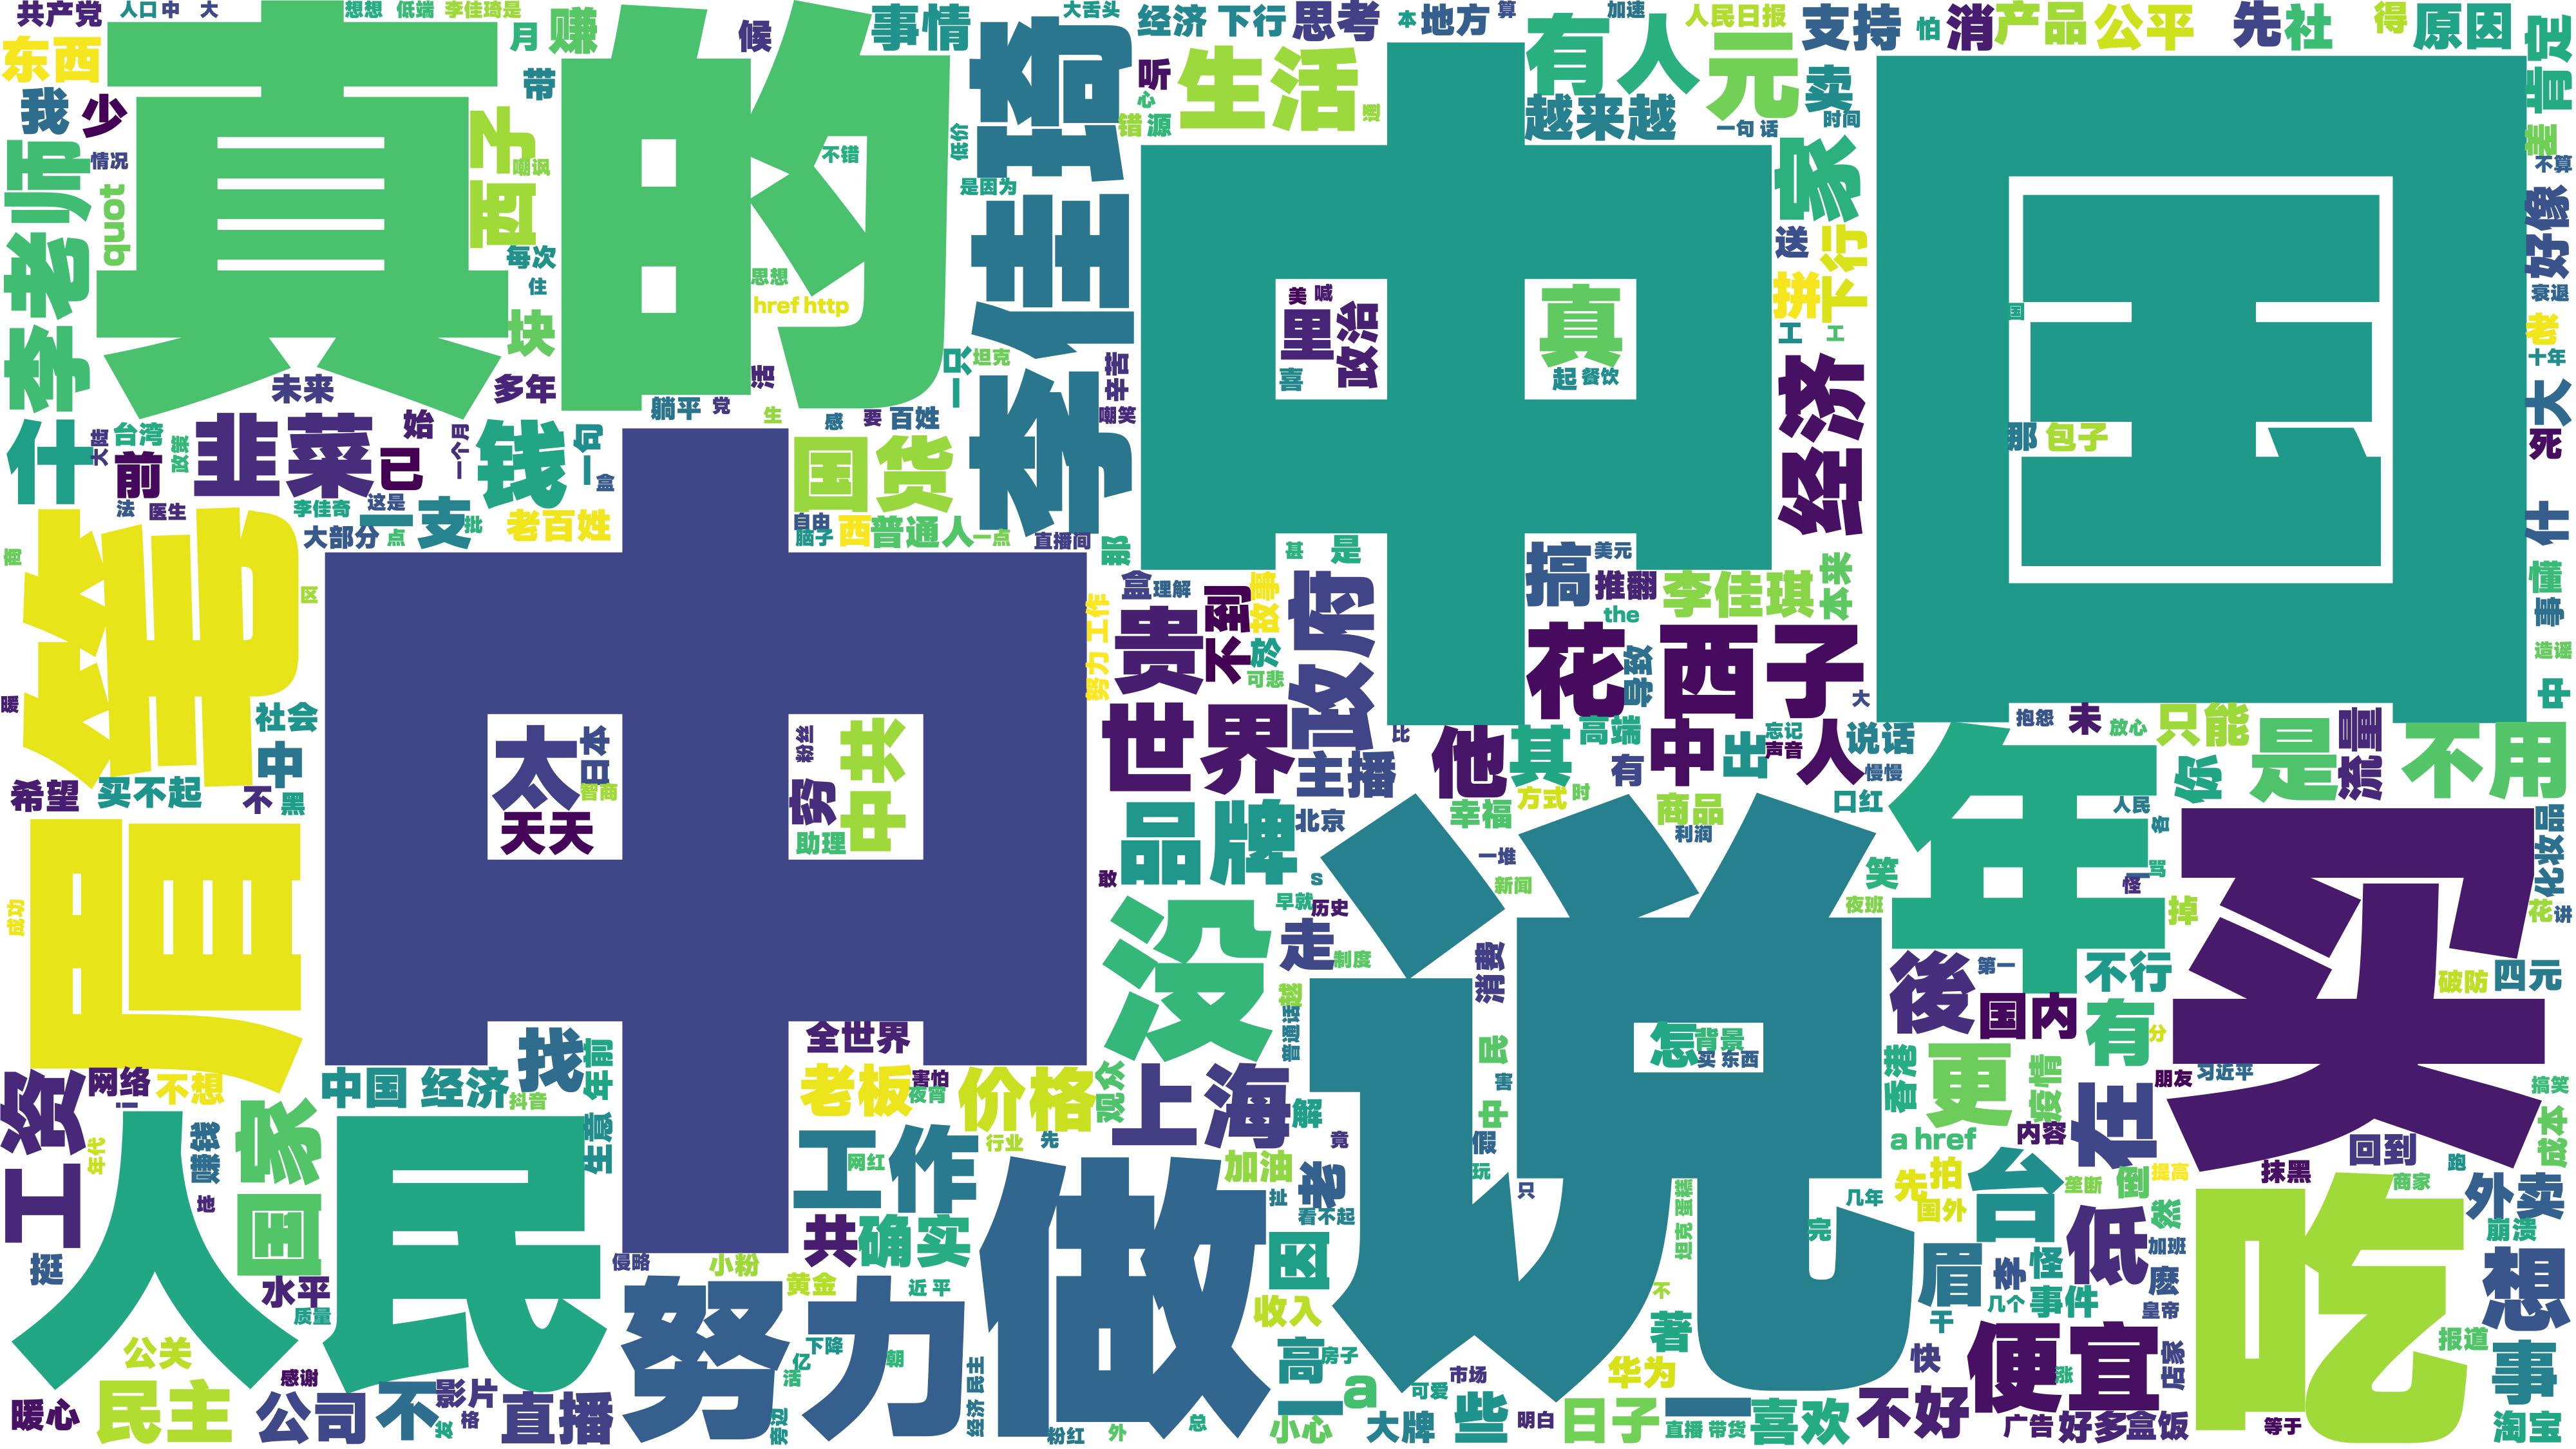

In [ ]:

# 词云图

stopwords = open(r"stop_word.txt",encoding='utf-8').read().split("\n")

wc = WordCloud(
    scale=5,  # 清晰度
    margin=0,  # 边距
    background_color="white",  # 背景颜色
    max_words=1200,  # 最大字符数
    width=800,  # 图宽
    height=450,  # 图高
    font_path='/Users/wangshuoxin/python_document/爬虫/油管测试/HYQiHei-105.ttf',  # Mac系统字体文件路径
    stopwords=stopwords,  # 停用词
    random_state=800  # 设置有多少种随机生成状态，即有多少种配色方案
)
wc.generate_from_text(jieba_text)  # 生成词云图
wc.to_file('油管评论_词云图.png')  # 保存图片
wc.to_image()  # 显示图片

In [11]:
#接下来进行情感分析
import pandas as pd  # 数据分析库
from textblob import TextBlob  # 英文情感分析库(其实分析微博用不到)
import matplotlib.pyplot as plt  # 画图
from snownlp import SnowNLP #这个才关键
from wordcloud import ImageColorGenerator
from PIL import Image
import numpy as np

In [12]:
file = "油管评论.csv"
df2 = pd.read_csv(file, lineterminator="\n",usecols=[1,2,3]) #读取抖音数据
df2.head(10)

,publishtime,likeCount,comment
0,2023-11-26T11:00:33Z,0.0,拼多多的APP，，很流氓，，后台很不规矩
1,2023-11-26T09:33:13Z,0.0,我在淘寶買了公仔.收到貨時.就覺得人物就怪怪的.在網上問別人.才知道自己買到盜版T-T倒不是...
2,2023-11-18T04:53:00Z,0.0,可是你有想過製造這些產品的勞工必定被剝削勞力薪資
3,2023-11-15T07:28:29Z,1.0,在台灣買東西真的很方便，就算不用網拍去街上買其實也很快，而且網拍下來的東西有的品質真的不怎樣...
4,2023-11-15T06:36:43Z,1.0,拼多多有聽說過不錯，但是海外的人不好註冊。
5,2023-11-14T10:28:35Z,0.0,東昇西降，阻國真牆大，購暖心😊
6,2023-11-13T08:34:49Z,2.0,淘寶早就不行了。現在拼多多抖音 甚至視頻號都比淘寶好。
7,2023-11-12T04:23:26Z,1.0,內容說得真貼切，👍🏻
8,2023-11-11T14:24:03Z,1.0,抖音要實名才能買東西，台胞證不行除非辦個18碼的居民居住證，感覺今年雙11銷售是真的不好，前...
9,2023-11-11T12:41:44Z,0.0,在网络上了几次当，很少网络買了。在大马，身份被盗取了，很鬼麻烦的😡！


In [13]:
#  情感分析
df2['情感'] = df2['comment'].apply(lambda x: SnowNLP(x).sentiments if isinstance(x, str) else 0.0)
df2.head()

,publishtime,likeCount,comment,情感
0,2023-11-26T11:00:33Z,0.0,拼多多的APP，，很流氓，，后台很不规矩,0.234728
1,2023-11-26T09:33:13Z,0.0,我在淘寶買了公仔.收到貨時.就覺得人物就怪怪的.在網上問別人.才知道自己買到盜版T-T倒不是...,0.977121
2,2023-11-18T04:53:00Z,0.0,可是你有想過製造這些產品的勞工必定被剝削勞力薪資,0.741640
3,2023-11-15T07:28:29Z,1.0,在台灣買東西真的很方便，就算不用網拍去街上買其實也很快，而且網拍下來的東西有的品質真的不怎樣...,0.150732
4,2023-11-15T06:36:43Z,1.0,拼多多有聽說過不錯，但是海外的人不好註冊。,0.519508


In [14]:
#  情感数据描述
df2.describe()

,likeCount,情感
count,1415.000000,1418.000000
mean,5.241696,0.446409
std,33.298013,0.364766
min,0.000000,0.000000
25%,0.000000,0.066364
50%,0.000000,0.403458
75%,1.000000,0.809867
max,690.000000,1.000000


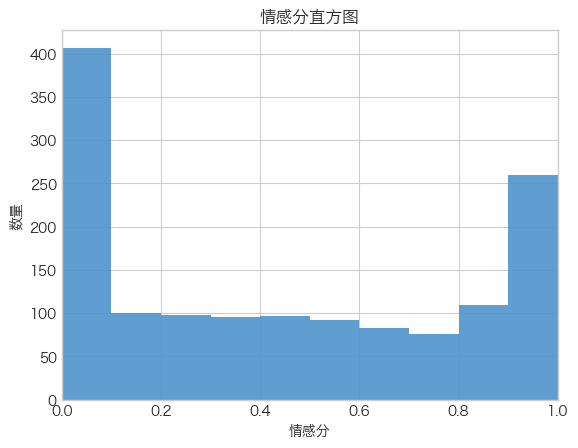

In [15]:
#  绘制情感分直方图
 
plt.rcParams['font.sans-serif'] = ['Hiragino Sans GB']
plt.rcParams['axes.unicode_minus'] = False
 
bins = np.arange(0, 1.1, 0.1)
plt.hist(df2['情感'], bins, color = '#4F94CD', alpha=0.9)
plt.xlim(0, 1)
plt.xlabel('情感分')
plt.ylabel('数量')
plt.title('情感分直方图')
plt.show()

In [16]:
#  关键词提取top10
#  这儿直接写import jieba运行会显示没有analyse属性
from jieba import analyse
key_words = jieba.analyse.extract_tags(sentence=jieba_text, topK=10, withWeight=True, allowPOS=())
key_words

[('br', 0.0966579514530232),
 ('中國', 0.08475081250591164),
 ('西子', 0.04900191341017108),
 ('李佳琦', 0.04552729597425005),
 ('眉笔', 0.04050337061273729),
 ('經濟', 0.03782267665553082),
 ('79', 0.036421836779400044),
 ('台灣', 0.03432057696520389),
 ('什麼', 0.03151889721294234),
 ('就是', 0.02867074986247012)]

In [17]:
#  计算积极评论与消极评论各自的数目
pos, neg = 0, 0
for i in df2['情感']:
    if i >= 0.4:
        pos += 1
    else:
        neg += 1
print('积极评论数目为:', pos, '\n消极评论数目为：', neg)

积极评论数目为: 717 
消极评论数目为： 701


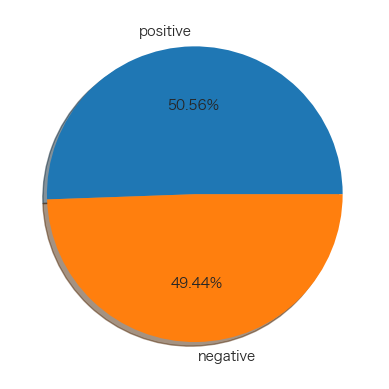

In [18]:
#  积极消极评论占比
import matplotlib.pyplot as plt
 
plt.rcParams['font.sans-serif']=['Hiragino Sans GB']
plt.rcParams['axes.unicode_minus'] = False
 
pie_labels = 'positive', 'negative'
plt.pie([pos, neg], labels=pie_labels, autopct='%1.2f%%', shadow=True)
 
plt.show()

In [19]:
#  获取消极评论的数据
data2 = df2[df2['情感'] < 0.4]
data2.head()

,publishtime,likeCount,comment,情感
0,2023-11-26T11:00:33Z,0.0,拼多多的APP，，很流氓，，后台很不规矩,0.234728
3,2023-11-15T07:28:29Z,1.0,在台灣買東西真的很方便，就算不用網拍去街上買其實也很快，而且網拍下來的東西有的品質真的不怎樣...,0.150732
7,2023-11-12T04:23:26Z,1.0,內容說得真貼切，👍🏻,0.095883
8,2023-11-11T14:24:03Z,1.0,抖音要實名才能買東西，台胞證不行除非辦個18碼的居民居住證，感覺今年雙11銷售是真的不好，前...,0.000007
9,2023-11-11T12:41:44Z,0.0,在网络上了几次当，很少网络買了。在大马，身份被盗取了，很鬼麻烦的😡！,0.163665


In [ ]:
#消极评论词云图
stopwords = open(r"stop_word.txt",encoding='utf-8').read().split("\n")
text2 = ''
for s in data2['comment']:
    if isinstance(s, str):  # 检查评论内容是否为字符串类型
        text2 += s
data_cut2 = ' '.join(jieba.lcut(text2))
wc.generate(data_cut2)
image = wc.to_file('消极油管词云.png')
wc.to_image()  # 显示图片

In [22]:
#  获取积极评论的数据
data3 = df2[df2['情感'] >= 0.4]
data3.head()

,publishtime,likeCount,comment,情感
1,2023-11-26T09:33:13Z,0.0,我在淘寶買了公仔.收到貨時.就覺得人物就怪怪的.在網上問別人.才知道自己買到盜版T-T倒不是...,0.977121
2,2023-11-18T04:53:00Z,0.0,可是你有想過製造這些產品的勞工必定被剝削勞力薪資,0.741640
4,2023-11-15T06:36:43Z,1.0,拼多多有聽說過不錯，但是海外的人不好註冊。,0.519508
5,2023-11-14T10:28:35Z,0.0,東昇西降，阻國真牆大，購暖心😊,0.770640
6,2023-11-13T08:34:49Z,2.0,淘寶早就不行了。現在拼多多抖音 甚至視頻號都比淘寶好。,0.806137


In [ ]:
#积极评论词云图
stopwords = open(r"stop_word.txt",encoding='utf-8').read().split("\n")
text3 = ''
for s in data3['comment']:
    if isinstance(s, str):  # 检查评论内容是否为字符串类型
        text3 += s
data_cut3 = ' '.join(jieba.lcut(text3))
wc.generate(data_cut3)
image = wc.to_file('积极油管词云.png')
wc.to_image()  # 显示图片